## Data Visualization (A)

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Change the format of the values visualization

pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Reset the maximum number of columns to display to default (all columns)

pd.set_option('display.max_columns', None)

In [4]:
# Importing project data

path = r'C:\Users\efens\cf_tasks\2023-07 Instacard Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', '022 Prepared Data', 'ords_prods_merge_agg.pkl'))

In [5]:
# Checking the data

ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days,frequency_flag
0,2539329,1,1,2,8,7.00,196,1,0,Soda,77,7,9.00,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer
1,2398795,1,2,3,7,15.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer
2,473747,1,3,3,12,21.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer
3,2254736,1,4,4,7,29.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer
4,431534,1,5,4,15,28.00,196,1,1,Soda,77,7,9.00,both,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,6.37,Low spender,20.00,Regular customer


## Creating bar charts

<Axes: >

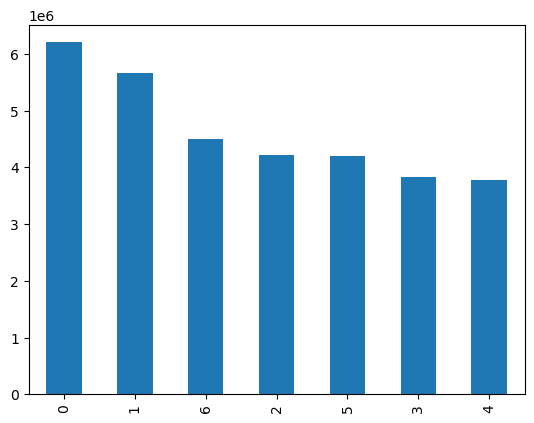

In [6]:
# Creating a bar chart for orders_days_of_week

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

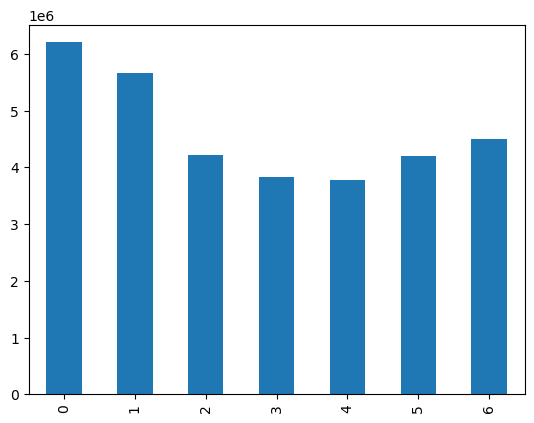

In [7]:
# Sorting the values into logical order

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [8]:
# Printing frequences (from max to min)

ords_prods_merge['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [9]:
# Printing frequences chronologically

ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

<Axes: >

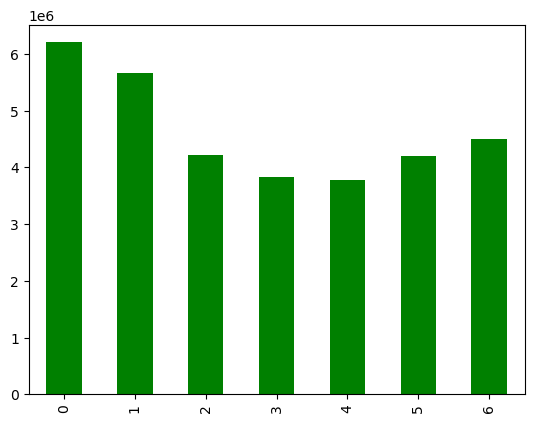

In [10]:
# Adding colors

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['green'])

<Axes: >

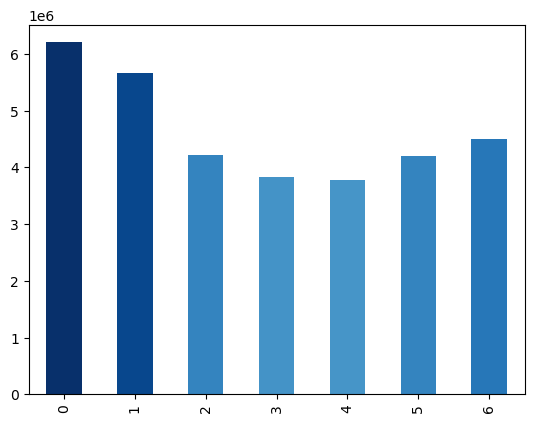

In [11]:
# Changing colors based on the count numbers

counts = ords_prods_merge['orders_day_of_week'].value_counts().sort_index()
colors = plt.cm.Blues(counts / counts.max())  # Using the 'Blue' colormap and scaling counts to range [0, 1]

counts.plot.bar(color=colors)

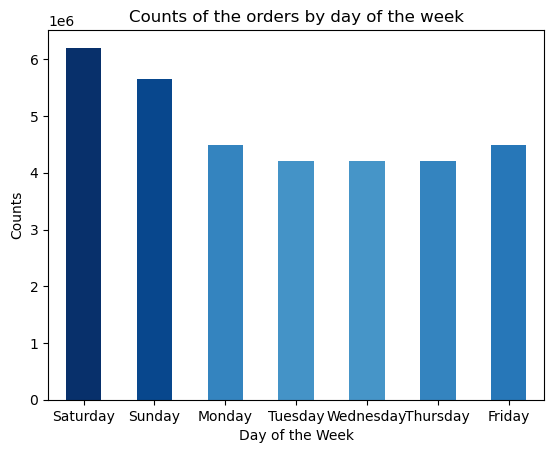

In [12]:
# Making a final chart for export

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =colors)

colors = plt.cm.Blues(counts / counts.max())  # Using the 'Blue' colormap and scaling counts to range [0, 1]

# Plotting the bar chart
ax = counts.plot.bar(color=colors)

# Adding title and labels to the plot
ax.set_title("Counts of the orders by day of the week")
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Counts")

# Changing the tick labels for the x-axis
day_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
ax.set_xticklabels(day_labels, rotation=0)

# Showing the plot
plt.show()


## Exporting charts

In [13]:
bar.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'bar_orders_dow.png'))

## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

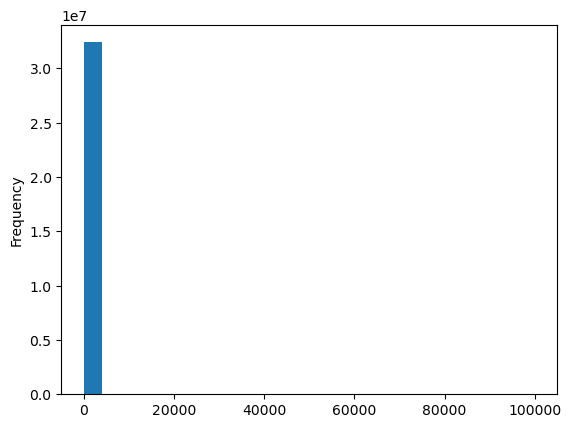

In [14]:
# Creating a histogramm of the 'prices' column

ords_prods_merge['prices'].plot.hist(bins = 25)

In [15]:
# Inspect the variable 'prices'

ords_prods_merge['prices'].describe()

count   32404859.00
mean          11.98
std          495.66
min            1.00
25%            4.20
50%            7.40
75%           11.30
max        99999.00
Name: prices, dtype: float64

In [16]:
# Calculating the average value

ords_prods_merge['prices'].mean()
# '{:.2f}'.format(ords_prods_merge['prices'].mean()) --> to show only 11.98

11.980225638383454

In [17]:
# Calculating the median

ords_prods_merge['prices'].median()

7.4

In [18]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

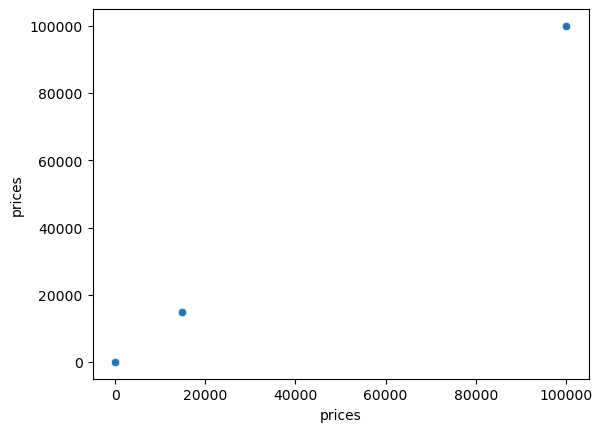

In [19]:
# Plotting the “prices” column against itself

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [20]:
# Check the ouliers where the price is above 100$

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days,frequency_flag
10030345,912404,17,12,2,14,5.00,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.00,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.65,High spender,5.00,Frequent customer
10030346,603376,17,22,6,16,4.00,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.00,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.65,High spender,5.00,Frequent customer
10030347,3264360,135,2,2,21,13.00,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.00,both,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.79,High spender,11.50,Regular customer
10030348,892534,135,3,0,8,12.00,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.00,both,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.79,High spender,11.50,Regular customer
10030349,229704,342,8,1,19,30.00,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.00,both,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.43,High spender,20.00,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.00,33664,1,0,2 % Reduced Fat Milk,84,16,99999.00,both,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.74,High spender,4.00,Frequent customer
29166210,2363282,204099,31,0,9,2.00,33664,1,1,2 % Reduced Fat Milk,84,16,99999.00,both,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.74,High spender,4.00,Frequent customer
29166211,3181945,204395,13,3,15,8.00,33664,25,0,2 % Reduced Fat Milk,84,16,99999.00,both,High-range product,Regularly busy,Least busiest days,Most orders,15,Regular customer,451.15,High spender,5.00,Frequent customer
29166212,2486215,205227,7,3,20,4.00,33664,8,0,2 % Reduced Fat Milk,84,16,99999.00,both,High-range product,Regularly busy,Least busiest days,Average orders,12,Regular customer,1178.38,High spender,7.00,Frequent customer


In [21]:
# Turning the unexpected values to NaN

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [22]:
# Checking the max value after excluding outliers

ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

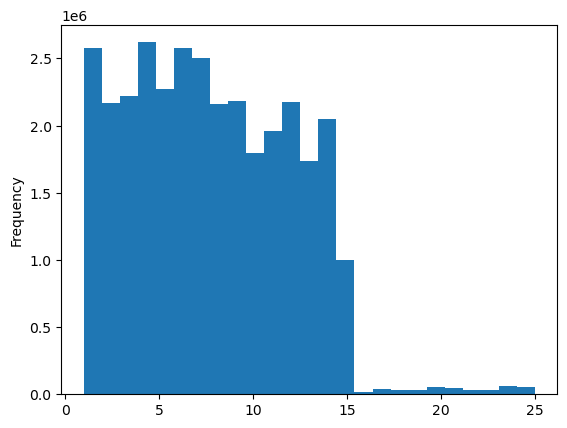

In [23]:
# New histogramm after excluding outliers

ords_prods_merge['prices'].plot.hist(bins = 25)

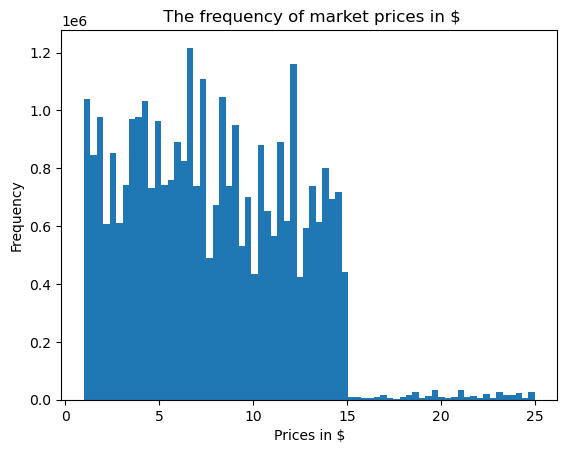

In [24]:
# Exploring a more detailled histogram

hist = ords_prods_merge['prices'].plot.hist(bins = 70)

# Adding title and labels to the histogram

plt.title(" The frequency of market prices in $")
plt.xlabel("Prices in $")
plt.ylabel("Frequency")

# Show the histogram
plt.show()

In [25]:
# Exporting a histogramm

hist.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'hist_prices.png'))

## Creating line charts

--> plot the “orders_day_of_week” column on the x-axis and the “prices” column on the y-axis

#### Sampling data

--> a representative subsection of a population
- ML example: Training a model - 80 % of a data set to train the algorithm
- Remaining 20 percent to check the accuracy of the model

--> Creating these samples requires a list of random floating numbers between 0 and 1 (1 --> 100%) => 0.7 --> to split 70/30

In [26]:
# Creating a random seeed

np.random.seed(4)

# Creating a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [27]:
# Checking the boolean values

dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
# Split the dataframe into two samples

big = ords_prods_merge[dev] # store 70% of the sample in the df big
small = ords_prods_merge[~dev] # store 30% of the sample in the df small

In [29]:
# Calculating the lenght of the whole df

len(ords_prods_merge)

32404859

In [30]:
# Comparing the results of the lenght of the whole df with sum of both subsets

len(big)+len(small)

32404859

In [31]:
# Reducing the number of columns to the number that is necessary

df_2 = small[['orders_day_of_week','prices']]

--> creating a line chart

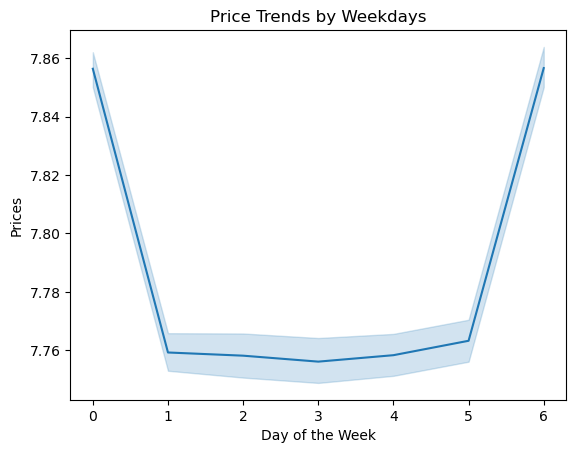

In [33]:
# Creating a line chart 

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Adding title and labels to the line chart

plt.title("Price Trends by Weekdays")
plt.xlabel("Day of the Week")
plt.ylabel("Prices")

# Show the histogram
plt.show()

In [34]:
# Exporting a histogramm

line.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'line_price_by_day.png'))